<img src="./img/logo_UTN.svg" align="right" width="300" />

# Trabajo Semanal 10 - Teoría de Circuitos 2
### Autor: Santiago Palozzo
  
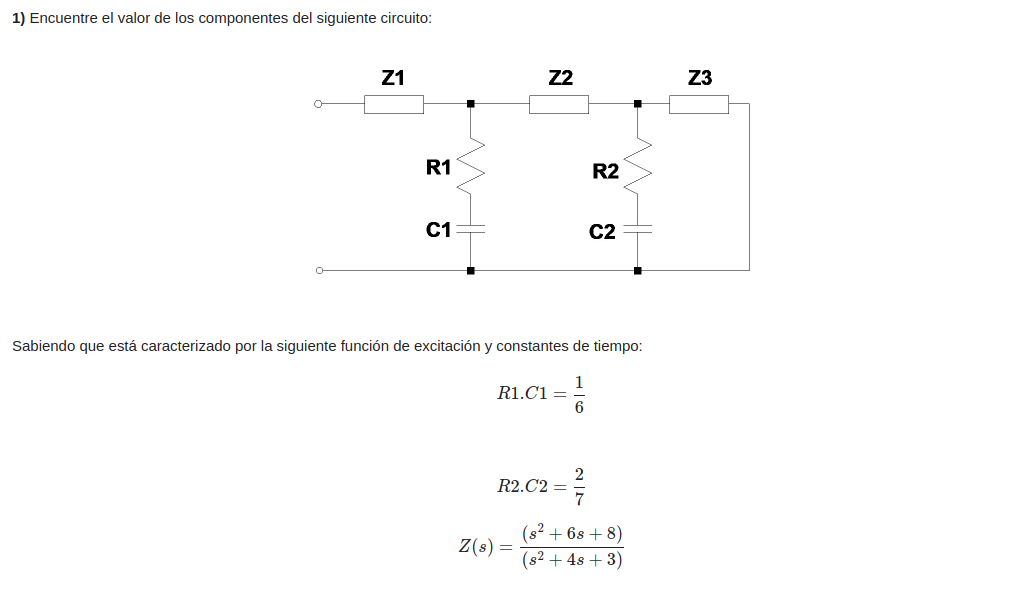

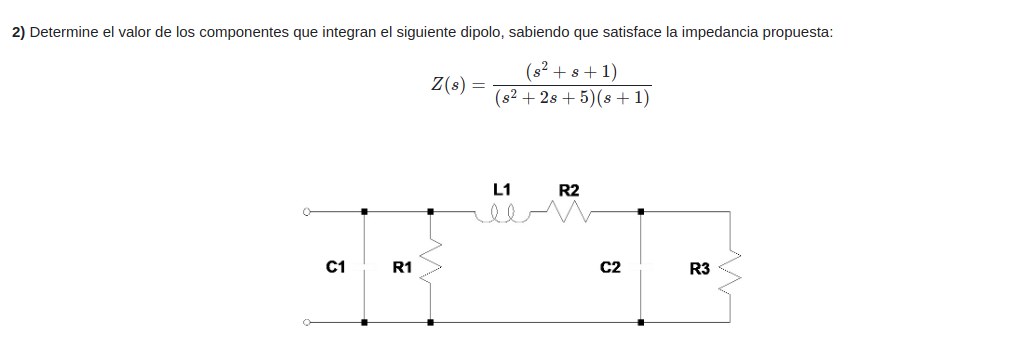

# 1. Desarrollo en papel


In [2]:
from IPython.display import IFrame
IFrame("./desarrollo.pdf", width=1000, height=800)

# 2. Simulacion simbólica en Python

Mediante las restricciones observadas en el prototipo pasabajos se realizo el diseño del mismo utilizando la aproximación de máxima planicidad.

In [1]:
#%% Inicializacion de librerias
# Librerías externas NumPy, SymPy y Matplotlib
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Librería de TC2
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.remociones import remover_valor, remover_polo_sigma, remover_polo_infinito

from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie
from pytc2.dibujar import dibujar_elemento_derivacion, Drawing, Resistor, dibujar_tanque_RC_derivacion, Line
from pytc2.dibujar import dibujar_espacio_derivacion, Line

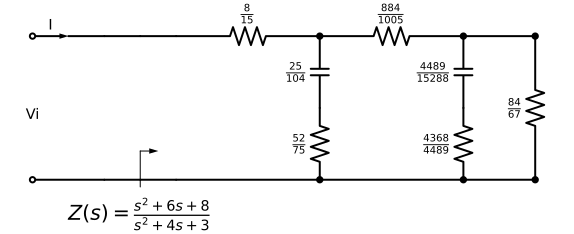

In [7]:
# Simulación simbólica
s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
Z1 = (s**2 + 6*s + 8)/(s**2 + 4*s + 3)

# Datos del ejercicio
sigma1 = 6
sigma2 = sp.Rational('7/2')

# Remociones   
Z2, Ra = remover_valor(Z1, sigma_zero = sigma1) # Remocion parcial - R en serie
Y4, Y3, R1, C1 = remover_polo_sigma(1/Z2, sigma1, isImpedance = False)  # Remocion finita - RC en paralelo
Z6, Rb = remover_valor(1/Y4, sigma_zero = sigma2) # Remocion parcial - R en serie
Y8, Y7, R2, C2 = remover_polo_sigma(1/Z6, sigma2, isImpedance = False) # Remocion finita - RC en paralelo
Rc = 1/Y8 # Residuo final - R en paralelo

# Dibujo la red
circuito = Drawing(unit=4)
circuito = dibujar_puerto_entrada(circuito,voltage_lbl = ('Vi'), current_lbl = 'I')
circuito, zz_lbl = dibujar_funcion_exc_abajo(circuito, 'Z(s)', Z1, hacia_salida = True, k_gap_width = 0.5)
circuito = dibujar_elemento_serie(circuito, Resistor, Ra)
circuito = dibujar_tanque_RC_derivacion(circuito, R1, C1)
circuito = dibujar_elemento_serie(circuito, Resistor, Rb)
circuito = dibujar_tanque_RC_derivacion(circuito, R2, C2)
circuito = dibujar_espacio_derivacion(circuito)
circuito = dibujar_elemento_derivacion(circuito, Resistor, Rc)

display(circuito)   

In [ ]:
# Sea la siguiente función de excitación
Z1 = (s**2 + s + 1)/(s**2 + 2*s + 5)/(s + 1)

# Datos del ejercicio
sigma1 = 6
sigma2 = sp.Rational('7/2')

# Remociones
# Primer parametro cuadripolo sobrante, segundo parametro elemento removido

# Remuevo un capacitor en k_inf
Y2, kC1 = remover_polo_infinito(1/Z1)
C1 = kC1/s # Me quedo con el valor del componente

# Analizo extremos reales de la funcion excitacion
G_inf = sp.limit(Y2, s, sp.oo)
G_0 = sp.limit(Y2, s, 0)
# Remuevo la menor admitancia
R1 = 1/np.min((Ginf, G0))
Y4 = Y2 - 1/R1

# Remuevo un inductor en k_inf
Z6, kL1 = remover_polo_infinito(1/Y4)
L1 = kL1/s # Me quedo con el valor del componente

# Analizo extremos reales de la funcion excitacion
Rinf = sp.limit(Z6, s, sp.oo)
R0 = sp.limit(Z6, s, 0)
# Remuevo la menor resistencia
R2 = np.min((Rinf, R0))
Z8 = Z6 - R2

# Remuevo un capacitor en k_inf
Y10, kC2 = remover_polo_infinito(1/Z8)
C2 = kC2/s # Me quedo con el valor del componente

# El residuo final es una R en paralelo
R3 = 1/Y10

# Dibujo la red
circuito = Drawing(unit=4)
circuito = dibujar_puerto_entrada(circuito, voltage_lbl = ('V'), current_lbl = 'I')
circuito, zz_lbl = dibujar_funcion_exc_abajo(circuito, 'Z', Fz, hacia_salida = True,k_gap_width = 0.5)
circuito = dibujar_elemento_derivacion(circuito, Capacitor, C1)
circuito = dibujar_espacio_derivacion(circuito)
circuito = dibujar_elemento_derivacion(circuito, Resistor, R1)
circuito = dibujar_elemento_serie(circuito, Inductor, L1)
circuito = dibujar_elemento_serie(circuito, Resistor, R2)
circuito = dibujar_elemento_derivacion(circuito, Capacitor, C2)
circuito = dibujar_espacio_derivacion(circuito)
circuito = dibujar_elemento_derivacion(circuito, Resistor, R3)
display(circuito)